In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/trab1/cursos-prouni.csv - cursos-prouni-2018-tratados.csv.csv',
                    )

In [5]:
df.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,universidade_nome,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,Medicina,739.62,738.08,738.96,718.64
1,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,Faculdade Barão do Rio Branco - FAB,Medicina,758.32,723.94,734.92,711.26
2,Bacharelado,Integral,9023.07,4.0,4.0,5.0,5.0,65921511844324,Medicina,Itaperuna,RJ,Faculdade Redentor - FACREDENTOR,Medicina,741.06,729.02,730.98,722.82
3,Bacharelado,Integral,8508.54,2.0,1.0,7.0,2.0,104123711716094,Medicina,Belem,PA,Faculdade Metropolitana da Amazônia - FAMAZ,Medicina,741.36,739.90,760.80,715.10
4,Bacharelado,Integral,8281.38,3.0,1.0,6.0,2.0,105887911921884,Medicina,Imperatriz,MA,Universidade do Ceuma - Uniceuma - UNICEUMA,Medicina,756.46,737.88,747.14,717.60


In [6]:
list_drop_columns = ['grau',
                     'turno',
                     'curso_busca',
                     'curso_id',
                     'bolsa_parcial_ampla',
                     'bolsa_parcial_cotas',
                     'bolsa_integral_ampla',
                     'bolsa_integral_cotas',
                     'mensalidade',
                     'cidade_busca',
                     'uf_busca',
                    'universidade_nome',
                     ]

df_aux = df.drop(columns=list_drop_columns)
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nome                 2203 non-null   object 
 1   nota_integral_ampla  2203 non-null   float64
 2   nota_integral_cotas  2203 non-null   float64
 3   nota_parcial_ampla   2203 non-null   float64
 4   nota_parcial_cotas   2203 non-null   float64
dtypes: float64(4), object(1)
memory usage: 86.2+ KB


In [7]:
df_aux.head()

,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26
2,Medicina,741.06,729.02,730.98,722.82
3,Medicina,741.36,739.90,760.80,715.10
4,Medicina,756.46,737.88,747.14,717.60


ATRIBUTOS:

nome: Nome do curso

nota_integral_ampla: Nota da categoria de bolsa integral de ampla concorrência

nota_integral_cotas: Nota da categoria de bolsa integral com aplicação de cotas

nota_parcial_ampla: Nota da categoria de bolsa parcial de ampla concorrência

nota_parcial_cotas: Nota da categoria de bolsa parcial com aplicação de cotas

**Nota Integral Cotas**

In [8]:
import plotly.express as px

In [9]:
hist =  px.histogram (df_aux,  x = "nota_integral_cotas", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição de Notas - Integral Cotas') 
hist.show()

**Nota Parcial Ampla**

In [10]:
df_aux['nota_parcial_ampla'].value_counts()

450.00    315
575.32      4
587.22      4
585.98      3
584.44      3
         ... 
579.98      1
598.72      1
559.76      1
601.42      1
508.48      1
Name: nota_parcial_ampla, Length: 1684, dtype: int64

In [11]:
import seaborn as sns
#from matplotlib import pyplot as plt

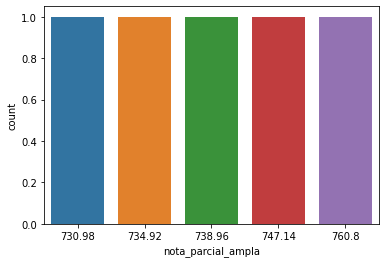

In [12]:
sns.countplot(x='nota_parcial_ampla', data=df_aux.head())

In [13]:
df_aux.shape

(2203, 5)

Exploração e tratamento de dados:

In [14]:
#mudando os nomes das colunas
df_aux.head(2)

,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26


In [15]:
df_aux.rename(columns={'nome': 'nome_do_curso'}, inplace=True)

In [16]:
df_aux.head(3)

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26
2,Medicina,741.06,729.02,730.98,722.82


Valores NaN

In [17]:
# RELAÇÃO DA QUANTIDADE
df_aux.isnull().sum()

nome_do_curso          0
nota_integral_ampla    0
nota_integral_cotas    0
nota_parcial_ampla     0
nota_parcial_cotas     0
dtype: int64

Tipos de atributos

In [18]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df_aux.dtypes

nome_do_curso           object
nota_integral_ampla    float64
nota_integral_cotas    float64
nota_parcial_ampla     float64
nota_parcial_cotas     float64
dtype: object

Dados estatísiticos

In [19]:
df_aux.describe()

,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
count,2203.000000,2203.000000,2203.000000,2203.000000
mean,599.380390,574.097921,547.297204,521.452964
std,53.194117,59.868058,58.971101,56.371352
min,450.000000,450.000000,450.000000,450.000000
25%,569.530000,542.290000,507.260000,450.000000
50%,602.040000,583.320000,555.240000,526.540000
75%,634.550000,614.340000,588.140000,563.600000
max,781.200000,792.240000,776.360000,768.340000


Outliers

In [20]:
import plotly.express as px

In [21]:
boxplot = px.box(df_aux, y="nota_integral_ampla")
boxplot.show()

In [22]:
boxplot = px.box(df_aux, y="nota_integral_cotas")
boxplot.show()

In [23]:
boxplot = px.box(df_aux, y="nota_parcial_ampla")
boxplot.show()

In [24]:
boxplot = px.box(df_aux, y="nota_parcial_cotas")
boxplot.show()

Pré-processamento

In [25]:
df_aux.head(2)

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26


In [26]:
#excluindo noome

df2 = df_aux.drop(labels = 'nome_do_curso', axis = 1)

In [27]:
df2.head(2)

,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,739.62,738.08,738.96,718.64
1,758.32,723.94,734.92,711.26


Escalonamento

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
escala = StandardScaler()

In [31]:
df2_esc = escala.fit_transform(df2)

In [32]:
df2_esc

array([[ 2.63697298,  2.73967981,  3.25085185,  3.49879504],
       [ 2.98859543,  2.50344014,  3.18232816,  3.36784775],
       [ 2.66404979,  2.58831267,  3.11550061,  3.57296301],
       ...,
       [-1.91042663, -1.12469332, -0.65839058, -1.23624466],
       [-2.68361995, -2.07332759, -1.65028791, -1.26782816],
       [-1.24177988, -2.07332759, -1.65028791, -1.26782816]])

K Means com 2 atributos

In [33]:
df2

,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,739.62,738.08,738.96,718.64
1,758.32,723.94,734.92,711.26
2,741.06,729.02,730.98,722.82
3,741.36,739.90,760.80,715.10
4,756.46,737.88,747.14,717.60
...,...,...,...,...
2198,584.34,450.00,489.28,450.00
2199,450.00,450.00,450.00,450.00
2200,497.78,506.78,508.48,451.78
2201,456.66,450.00,450.00,450.00


In [34]:
dados = df2.iloc[:, [2,3]].values

In [35]:
dados

array([[738.96, 718.64],
       [734.92, 711.26],
       [730.98, 722.82],
       ...,
       [508.48, 451.78],
       [450.  , 450.  ],
       [450.  , 450.  ]])

Elbow Method

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

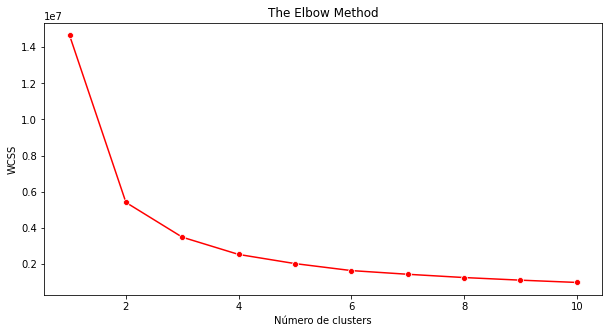

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

Agrupamento

In [39]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [40]:
kmeans1 = kmeans.fit(dados)

In [41]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[624.6165651 , 600.82066482],
       [460.81938776, 455.88689796],
       [535.76247148, 484.61353612],
       [572.15084746, 549.12024213]])

In [42]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([0, 0, 0, ..., 2, 1, 1], dtype=int32)

In [43]:
dados[2,:]

array([730.98, 722.82])

In [44]:
classificacao[3]

0

In [45]:
import plotly.express as px
import plotly.graph_objects as go

In [46]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'nota_integral_ampla')
graf3.update_yaxes(title = 'nota_parcial_cotas')
graf3.show()

In [47]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,0
1,0
2,0
3,0
4,0
...,...
2198,1
2199,1
2200,2
2201,1


In [48]:
df3 = pd.concat([df_aux, agrupamento],axis=1)
df3

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
0,Medicina,739.62,738.08,738.96,718.64,0
1,Medicina,758.32,723.94,734.92,711.26,0
2,Medicina,741.06,729.02,730.98,722.82,0
3,Medicina,741.36,739.90,760.80,715.10,0
4,Medicina,756.46,737.88,747.14,717.60,0
...,...,...,...,...,...,...
2198,Teologia,584.34,450.00,489.28,450.00,1
2199,Teologia,450.00,450.00,450.00,450.00,1
2200,Pedagogia,497.78,506.78,508.48,451.78,2
2201,Gestão da Qualidade,456.66,450.00,450.00,450.00,1


In [49]:
df3.iloc[150 , :]

nome_do_curso          Engenharia Civil
nota_integral_ampla              641.46
nota_integral_cotas               619.7
nota_parcial_ampla               578.08
nota_parcial_cotas               551.42
Grupo                                 3
Name: 150, dtype: object

In [50]:
df3.loc[df3.nome_do_curso == 'Enfermagem'] 

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
54,Enfermagem,580.28,608.58,528.90,524.44,2
55,Enfermagem,588.96,587.32,561.04,542.66,3
80,Enfermagem,619.34,588.92,450.00,450.00,1
134,Enfermagem,573.48,573.62,590.70,589.36,0
135,Enfermagem,588.50,593.26,552.70,535.66,3
...,...,...,...,...,...,...
1364,Enfermagem,673.74,604.06,570.44,573.70,3
1375,Enfermagem,574.20,545.06,512.28,450.00,2
1380,Enfermagem,607.90,580.52,565.60,531.70,3
1425,Enfermagem,582.30,578.06,592.04,546.08,3


In [51]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0 

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
0,Medicina,739.62,738.08,738.96,718.64,0
1,Medicina,758.32,723.94,734.92,711.26,0
2,Medicina,741.06,729.02,730.98,722.82,0
3,Medicina,741.36,739.90,760.80,715.10,0
4,Medicina,756.46,737.88,747.14,717.60,0
...,...,...,...,...,...,...
1879,Letras - Português e Inglês,623.68,566.88,632.04,566.66,0
2031,Pedagogia,555.12,555.72,598.24,606.50,0
2075,Letras - Português e Inglês,668.08,629.14,640.12,548.02,0
2111,Gestão Pública,601.90,564.66,713.20,535.42,0


In [52]:
grupo0.shape

(362, 6)

In [53]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
79,Fisioterapia,643.58,623.30,450.00,517.18,1
80,Enfermagem,619.34,588.92,450.00,450.00,1
98,Fisioterapia,591.76,592.12,450.00,450.00,1
112,Fisioterapia,570.32,567.06,465.50,450.00,1
123,Redes de Computadores,583.00,587.88,467.26,450.00,1
...,...,...,...,...,...,...
2193,Gestão Comercial,566.62,450.00,500.92,450.00,1
2198,Teologia,584.34,450.00,489.28,450.00,1
2199,Teologia,450.00,450.00,450.00,450.00,1
2201,Gestão da Qualidade,456.66,450.00,450.00,450.00,1


In [54]:
grupo1.shape

(490, 6)

In [55]:
#K Means com todos os atributos
df2_esc

array([[ 2.63697298,  2.73967981,  3.25085185,  3.49879504],
       [ 2.98859543,  2.50344014,  3.18232816,  3.36784775],
       [ 2.66404979,  2.58831267,  3.11550061,  3.57296301],
       ...,
       [-1.91042663, -1.12469332, -0.65839058, -1.23624466],
       [-2.68361995, -2.07332759, -1.65028791, -1.26782816],
       [-1.24177988, -2.07332759, -1.65028791, -1.26782816]])

In [56]:
df2_esc.shape

(2203, 4)

In [57]:
#Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

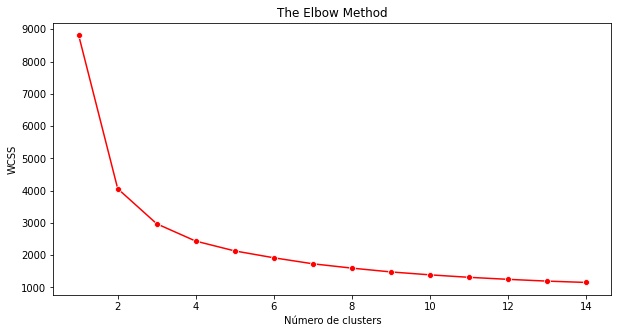

In [59]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

Agrupamento

In [60]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)

In [61]:
kmeans2 = kmeans.fit(df2_esc)

In [64]:
#coordenadas dos centróides
centroides = kmeans2.cluster_centers_
centroides

array([[ 0.23344607,  0.28973642,  0.33403455,  0.36868635],
       [-0.43872656, -0.27107656, -1.38826261, -1.09953073],
       [ 2.33285371,  2.15644938,  2.49119947,  2.58117412],
       [-1.62868316, -1.7742456 , -1.36834604, -1.210349  ],
       [-0.38647047, -0.41254802, -0.14426472, -0.57204395],
       [ 0.98956817,  0.95048124,  0.95676967,  1.04615353]])

In [63]:
#inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[611.79552906, 591.43994039, 566.99111773, 542.23159463],
       [576.04801587, 557.87277778, 465.4484127 , 459.485     ],
       [723.44631579, 703.17105263, 694.17263158, 666.92421053],
       [512.76369338, 467.90139373, 466.62264808, 453.23944251],
       [578.82710112, 549.40507865, 538.79168539, 489.21339326],
       [652.00764706, 630.98847059, 603.70615686, 580.41266667]])

In [65]:
#classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [66]:
classificacao2[199]

5

In [67]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,2
1,2
2,2
3,2
4,2
...,...
2198,3
2199,3
2200,3
2201,3


In [68]:
df4 = pd.concat([df_aux, agrupamento2],axis=1)
df4

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
0,Medicina,739.62,738.08,738.96,718.64,2
1,Medicina,758.32,723.94,734.92,711.26,2
2,Medicina,741.06,729.02,730.98,722.82,2
3,Medicina,741.36,739.90,760.80,715.10,2
4,Medicina,756.46,737.88,747.14,717.60,2
...,...,...,...,...,...,...
2198,Teologia,584.34,450.00,489.28,450.00,3
2199,Teologia,450.00,450.00,450.00,450.00,3
2200,Pedagogia,497.78,506.78,508.48,451.78,3
2201,Gestão da Qualidade,456.66,450.00,450.00,450.00,3


In [69]:
df4.iloc[125 , :]

nome_do_curso          Arquitetura e Urbanismo
nota_integral_ampla                     595.68
nota_integral_cotas                     553.52
nota_parcial_ampla                      578.16
nota_parcial_cotas                      523.72
Grupo                                        0
Name: 125, dtype: object

In [70]:
df4.loc[df4.nome_do_curso == 'Psicologia'] 

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
87,Psicologia,602.76,605.84,553.12,571.10,0
101,Psicologia,636.60,638.20,622.40,573.90,5
102,Psicologia,630.88,616.06,686.06,599.32,5
138,Psicologia,664.58,672.80,657.10,613.50,5
139,Psicologia,652.82,664.44,604.04,634.06,5
...,...,...,...,...,...,...
1074,Psicologia,596.36,596.44,512.98,509.86,4
1119,Psicologia,626.02,619.22,593.02,575.70,5
1190,Psicologia,605.66,584.26,600.98,557.70,0
1209,Psicologia,634.82,644.48,591.66,552.76,5


In [71]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0 

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
21,Odontologia,667.28,608.36,565.78,521.86,0
27,Engenharia Civil,603.60,613.74,589.42,564.40,0
38,Odontologia,679.32,645.52,529.40,502.48,0
42,Odontologia,639.18,620.28,566.80,538.08,0
51,Fisioterapia,632.36,591.84,532.68,516.00,0
...,...,...,...,...,...,...
2152,Ciências Contábeis,591.86,609.40,597.32,507.04,0
2153,Análise e Desenvolvimento de Sistemas,599.40,592.90,590.96,525.42,0
2165,Gestão de Recursos Humanos,563.46,522.74,536.14,614.82,0
2189,Administração,618.46,592.36,610.46,538.62,0


In [72]:
grupo0.shape

(672, 6)